# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('Data/airbnb_listings.csv', index_col=0)

/var/folders/yq/_wc38b1j6f351x0h8rrf7kj80000gn/T/ipykernel_69012/3850777628.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [4]:
# Q1
display(df.head())

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [5]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50791 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  longitude

In [6]:
#Q2
def calc_missing(col):
    missing_num = df[col].isnull().sum()
    missing_perc = missing_num / df.shape[0] * 100
    return [missing_num, round(missing_perc, 1)]

columns = ['missing_num', 'missing_%']
values = []
index = []
for col in df.columns:
    val = calc_missing(col)
    if val[0] != 0: 
        values.append(val)
        index.append(col)

_df = pd.DataFrame(values, columns = columns, index = index)
_df = _df.sort_values(by = 'missing_num', ascending = False)
display(_df)

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_value,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

/var/folders/yq/_wc38b1j6f351x0h8rrf7kj80000gn/T/ipykernel_69012/4112208088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


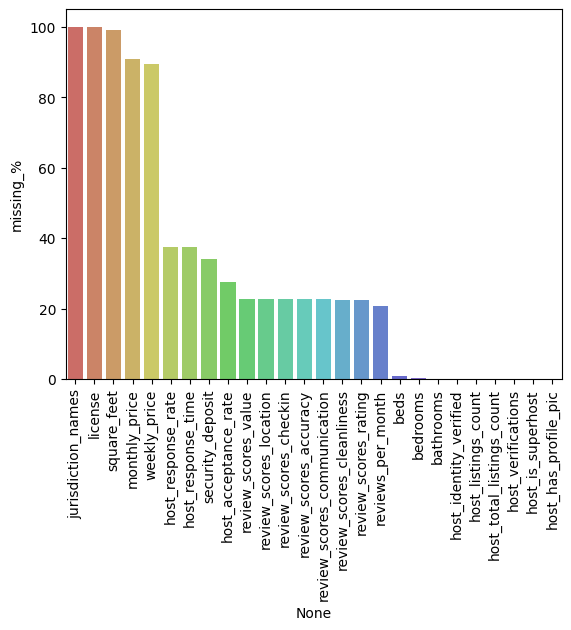

In [7]:
# Q3
fig, ax = plt.subplots()
ax = sns.barplot(
    x = _df.index,
    y = _df['missing_%'],
    palette = sns.color_palette("hls", n_colors=_df.shape[0], desat=1),
)
ax.tick_params(axis = 'x', rotation = 90)

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [8]:
# Q4
df[df.beds.isnull()].head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [9]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [10]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50791 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room_type

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

<Axes: xlabel='room_type', ylabel='count'>

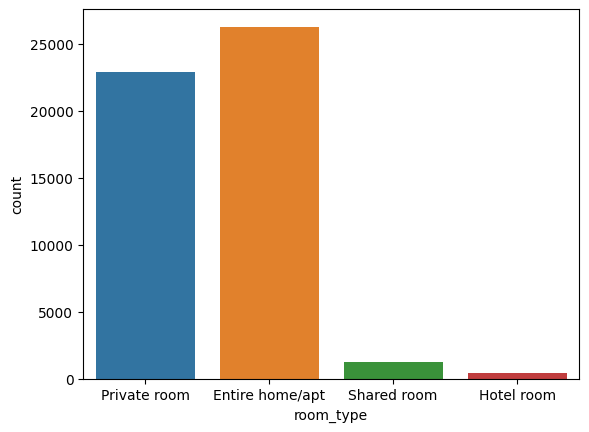

In [12]:
# Q5
f, ax = plt.subplots()
sns.countplot(df, x = 'room_type', hue = 'room_type', ax = ax)

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

<Axes: xlabel='room_type', ylabel='proportion'>

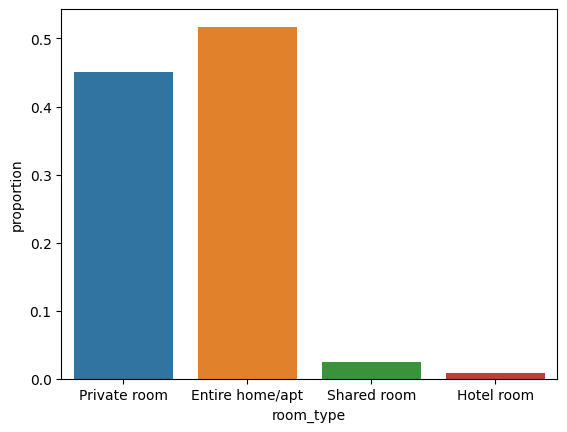

In [13]:
# Q6
f, ax = plt.subplots()
sns.countplot(df, x = 'room_type', hue = 'room_type', stat = 'proportion', ax = ax)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

<Axes: xlabel='neighborhood', ylabel='count'>

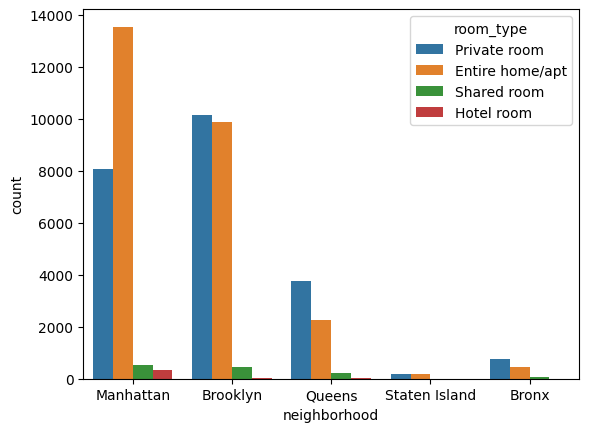

In [14]:
# Q7
f, ax = plt.subplots()
sns.countplot(x = 'neighborhood', hue = 'room_type', data = df)

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<Axes: xlabel='neighborhood', ylabel='price'>

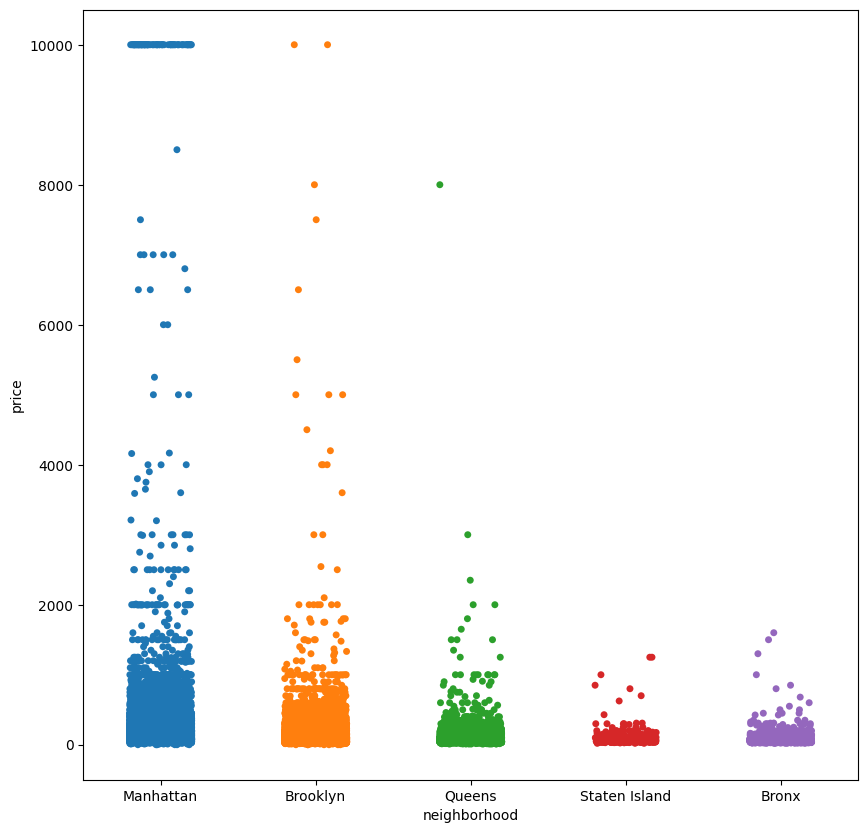

In [15]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize = (10, 10))
sns.stripplot(x = 'neighborhood', y = 'price', hue = 'neighborhood', data = df, jitter = 0.2)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [16]:
# Q9
# Manhattan과 Brooklyn은 상대적으로 Staten Island와 Bronx보다 분포가 다양합니다.
# 그 이유는 Manhattan과 Brooklyn의 sample 개수가 매우 많아 그만큼 데이터가 다양하게 분포가 
# 되어 있을 수도 있다고 추측해볼 수 있습니다. 

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

(array([3.1006e+04, 5.5040e+03, 7.7540e+03, 2.0500e+03, 2.5020e+03,
        4.8500e+02, 7.5200e+02, 1.0700e+02, 2.5400e+02, 4.6000e+01,
        1.0800e+02, 2.0000e+01, 3.2000e+01, 1.7000e+01, 1.5600e+02,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.  ,  2.05,  3.1 ,  4.15,  5.2 ,  6.25,  7.3 ,  8.35,  9.4 ,
        10.45, 11.5 , 12.55, 13.6 , 14.65, 15.7 , 16.75, 17.8 , 18.85,
        19.9 , 20.95, 22.  ]),
 <BarContainer object of 20 artists>)

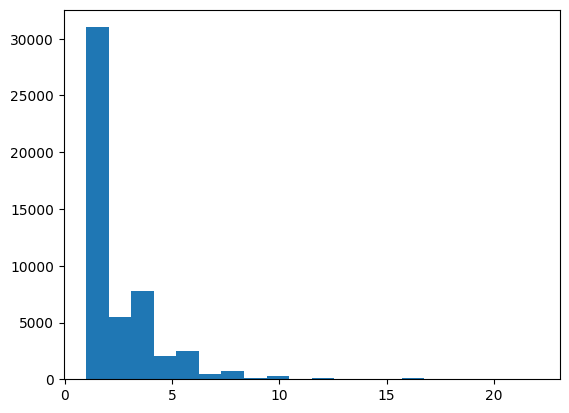

In [17]:
# Q10
plt.hist(df['accommodates'], bins = 20)

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

(array([7.000e+01, 2.140e+03, 7.033e+03, 7.391e+03, 6.234e+03, 4.696e+03,
        4.233e+03, 4.108e+03, 2.502e+03, 2.265e+03, 2.035e+03, 1.131e+03,
        1.594e+03, 5.840e+02, 6.390e+02, 7.620e+02, 2.990e+02, 5.200e+02,
        1.780e+02, 2.420e+02, 2.770e+02, 1.050e+02, 2.050e+02, 5.500e+01,
        1.230e+02, 1.940e+02, 2.900e+01, 9.000e+01, 2.200e+01, 6.600e+01,
        7.900e+01, 8.000e+00, 4.900e+01, 1.300e+01, 3.300e+01, 3.800e+01,
        6.000e+00, 6.900e+01, 1.000e+01, 3.100e+01, 6.400e+01, 6.000e+00,
        2.400e+01, 4.000e+00, 1.300e+01, 2.400e+01, 4.000e+00, 1.100e+01,
        1.000e+01, 1.260e+02]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,

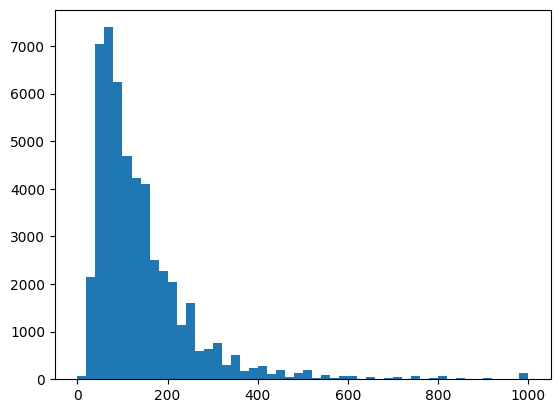

In [18]:
# Q11
plt.hist(df['price'], range = [0, 1000], bins = 50)

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [19]:
df = pd.read_csv('data/airbnb_listings.csv', index_col=0)

/var/folders/yq/_wc38b1j6f351x0h8rrf7kj80000gn/T/ipykernel_69012/3621372012.py:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [20]:
#Q12
drop_cols = []
drop_rows = []
replace_median = []

for col in df.columns:
    percentage = df[col].isnull().sum() / df.shape[0]
    if percentage >= 0.25:
        drop_cols.append(col)
    elif percentage >= 0.10:
        drop_rows.append(col)
    else:
        replace_median.append(col)

df = df.drop(columns = drop_cols)
df = df.dropna(axis = 0, subset = drop_rows)
for col in df.columns:
    if df[col].isnull().sum() > 0 and df[col].dtype != "object":
        df[col].fillna(df[col].median(skipna = True), inplace = True)

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [21]:
#Q13-1)
# 't' and 'f'를 numerical value로 encode하기 위해 라벨 인코딩으로
# 't'는 1로, 'f'는 0으로 인코딩 진행
for col in df.columns:
    val = df[col].unique()
    if 'f' in val or 't' in val:
        df[col] = df[col].map({'f': 0, 't': 1})
display(df.head())

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,0.0,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,0,0,0,strict_14_with_grace_period,1,1,0.38
2,3831,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,0,0,0,moderate,0,0,4.71
3,5099,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,0.0,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,0,0,0,moderate,1,1,0.59
4,5114,0.0,3.0,3.0,"['email', 'phone', 'reviews']",1.0,0.0,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,0,0,0,strict_14_with_grace_period,0,0,0.56
5,5121,0.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,0.0,Brooklyn,40.68688,-73.95596,...,10.0,9.0,9.0,0,0,0,strict_14_with_grace_period,0,0,0.38


In [22]:
#Q13-2)
# host_verifications에 배열이 저장되어 있으므로 
# 이를 feature split을 하고 인코딩 진행
hosts_all = []
for hosts in df["host_verifications"].values:
    cur_hosts = str(hosts).replace(' ', '')
    cur_hosts = cur_hosts[1:len(cur_hosts)-1].split(',')
    cur_hosts = [host.replace("'", "") for host in cur_hosts]
    for host in cur_hosts:
        if host not in hosts_all and host != '':
            hosts_all.append(host)

hosts_val = []

for hosts in df['host_verifications'].values:
    cur_hosts = str(hosts).replace(' ', '')
    cur_hosts = cur_hosts[1:len(cur_hosts)-1].split(',')
    cur_hosts = [host.replace("'", "") for host in cur_hosts]
    row = [0] * len(hosts_all)
    for j in range(len(hosts_all)):
        if hosts_all[j] in cur_hosts:
            row[j] = 1
    hosts_val.append(row)

hosts_all = ['host_verifications_' + host for host in hosts_all]
_df = pd.DataFrame(hosts_val, columns = hosts_all)

df = pd.concat([df.reset_index(drop = True), _df.reset_index(drop = True)], axis = 1)

display(df.head())

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,host_verifications_facebook,host_verifications_google,host_verifications_manual_online,host_verifications_sent_id,host_verifications_manual_offline,host_verifications_weibo,host_verifications_a,host_verifications_zhima_selfie,host_verifications_sesame,host_verifications_sesame_offline
0,2595,0.0,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Manhattan,40.75362,-73.98377,...,0,0,0,0,0,0,0,0,0,0
1,3831,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,Brooklyn,40.68514,-73.95976,...,0,0,0,0,0,0,0,0,0,0
2,5099,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,0.0,Manhattan,40.74767,-73.97500,...,0,0,0,0,0,0,0,0,0,0
3,5114,0.0,3.0,3.0,"['email', 'phone', 'reviews']",1.0,0.0,Manhattan,40.71910,-73.99040,...,0,0,0,0,0,0,0,0,0,0
4,5121,0.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,0.0,Brooklyn,40.68688,-73.95596,...,1,0,0,0,0,0,0,0,0,0


In [24]:
#Q13-3)
# 대부분 다른 column의 값은 0~1에 위치하는 반면에
# laittutde and longitude은 그렇지 않기 때문에 스케일링 진행
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()
sd_scaler = sd_scaler.fit_transform(df['latitude'].values.reshape(-1, 1))
df['latitude'] = sd_scaler

sd_scaler = StandardScaler()
sd_scaler = sd_scaler.fit_transform(df['longitude'].values.reshape(-1, 1))
df['longitude'] = sd_scaler

display(df.head())

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,host_verifications_facebook,host_verifications_google,host_verifications_manual_online,host_verifications_sent_id,host_verifications_manual_offline,host_verifications_weibo,host_verifications_a,host_verifications_zhima_selfie,host_verifications_sesame,host_verifications_sesame_offline
0,2595,0.0,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Manhattan,0.456400,-0.707616,...,0,0,0,0,0,0,0,0,0,0
1,3831,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,Brooklyn,-0.777294,-0.210748,...,0,0,0,0,0,0,0,0,0,0
2,5099,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,0.0,Manhattan,0.349209,-0.526128,...,0,0,0,0,0,0,0,0,0,0
3,5114,0.0,3.0,3.0,"['email', 'phone', 'reviews']",1.0,0.0,Manhattan,-0.165491,-0.844819,...,0,0,0,0,0,0,0,0,0,0
4,5121,0.0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,0.0,Brooklyn,-0.745947,-0.132109,...,1,0,0,0,0,0,0,0,0,0


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
